In [9]:
"""
Import block.
Pandas and Matplotlib used for data analysis
chardet used in pre-processing to determine the file encoding
"""

import pandas as pd
from matplotlib import cm as cm 
import matplotlib.pyplot as plt
import matplotlib
import chardet
import seaborn as sns
#from mpl_toolkits.basemap import Basemap
"""
This method detects the filetype and returns the string with the encoding type.
Input: file path + name as a string
Output: string with file encoding name (e.g. UTF-8, ISO-9959-1, etc.)
Below, this method was called on a sample of the dataset as the 180,000 rows and 
135 columns took too long to process before. The coding is 'ISO-8859-1'
"""
def detect_filetype(filename):
    read_name = open(filename,'rb').read()
    result = chardet.detect(read_name)
    res = result['encoding']
    return res

#enc = detect_filetype("data/gtds_sample.csv")
#print(enc)

"""
Dataset notes:
It's encoded in ISO-8859-1 format, rather than UTF-8 (determined using the detect_filetype() above)
There are mixed data types in the following columns: 4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121.
REMINDER: Filenames include the full path if the data file is in another folder. 
For this reason, it's customary to house the data file in the same directory as your Python script.
"""

df = pd.read_csv("data/gtds.csv",encoding='ISO-8859-1', low_memory = False)

#print(df.head())  # Prints the first 5 rows and their column names to the console
#print(df.columns) # Prints the names of the columns. Will truncate if there are more that 10 or so headers. 

# Renames the column headers using the format dataframe.rename(columns={'original_name':'new_name'})
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region', 
                   'city': 'City', 'latitude':'Lat', 'longitude':'Long','attacktype1_txt':'Attack_Type',
                   'target1':'Target','nkill':'Num_Killed','nwound':'Num_Wounded','summary':'Summary',
                   'gname':'Group','targtype1_txt':'Target_Type','weaptype1_txt':'Weapon_Type','motive':'Motive'},inplace=True)

# Eliminates columns with citations and other data we don't need.
df = df[['eventid','Year','Month','Day','Country', 'Region', 'City','Lat','Long','Attack_Type', 'Target', 'Num_Killed', 'Num_Wounded', 
         'Summary', 'Group','Target_Type', 'Weapon_Type', 'Motive']]

#print(df.columns) # Prints new column names and slimmed down dataframe

In [10]:
"""
Column Reading Method 1: Single column ('Country') with a specified number of rows (5 rows starting at row 0)
Not necessary to print to console. Just helpful when debugging/ processing data
"""
#print(df['Country'][0:5])

"""
Column Reading Method 2: Same principle as above. Just different than bracket form and reads from 0 - 5 instead. 
"""
#print(df.Country[0:6])

"""
Reading Multiple Columns 
**NOTE** You're passing in a list of comma-separated, string column names INSIDE the brackets 
like so: [['name1','name2']]
"""
#print(df[['Country', 'Region', 'City']][0:5])

"""
Reading individual rows with iloc[index]
Prints out the following information (based on print statement below):
eventid                              197000000002
Year                                         1970
Month                                           0
Day                                             0
Country                                    Mexico
Region                              North America
City                                  Mexico city
Lat                                       19.3719
Long                                     -99.0866
Attack_Type           Hostage Taking (Kidnapping)
Target                    Nadine Chaval, daughter
Num_Killed                                      0
Num_Wounded                                     0
Summary                                       NaN
Group          23rd of September Communist League
Target_Type               Government (Diplomatic)
Weapon_Type                               Unknown
Motive                                        NaN
Name: 1, dtype: object
"""
#print(df.iloc[1])

"""
Same principle as above, just multiple cities 
Gets the information for Santo Domingo, Mexico City, and an unknown location in the Philippines (all in 1970)
"""
#print(df.iloc[0:3]) 

"""
Uses iloc[] for a specific value/ location
Format: dataframe.iloc[Row#,Column#]
This example outputs Mexico
"""
#print(df.iloc[1,4])

'\nUses iloc[] for a specific value/ location\nFormat: dataframe.iloc[Row#,Column#]\nThis example outputs Mexico\n'

In [11]:
"""
Iterating through all the rows and printing the index and all column values
Prints out the country name in each row of the entire dataset
"""

#for index, row in df.iterrows():
#    print(index,row['Country'])

"""
Used to print the index and a selection of data using only the first three rows
If a row selection from the middle, or non-contiguous region is desired, 
create a new Dataframe object and assign it to the desired selection.
Use format: df_sample = df.loc[start:end]

Ex: 

df_sampl = df.loc[3:6]  # Selects the fourth through sixth rows

For selecting specific rows and specific columns:
Format:
df_sampl = df.loc[[row1,row2,row_n],[column1,column2,column_n]] 
(separates rows and columns with a comma)

Ex: 

df_sampl = df.loc[[2:8],['Country', 'Region', 'City']]
"""

#for index, row in df_sampl.iterrows():
#    print(index,row['Country'])


"""
Techniques for determining numbers of null values
This method gives us the overall number of rows left after dropping rows with at least one NaN value in any column
"""
#no_na = df.dropna(how='any')
#print(len(no_na))
#print(len(df))
#print("Number of rows dropped:\n",len(df)-len(no_na))

"""
This method totals all of the null entries for each column 
Since 72.85% of the 'Motive' column is null, it will be dropped. 
"""

#df.isnull().sum()

# Removes the 'Motive' column
df = df.drop(columns=['Motive'])

"""
"Drops" all rows with at least one NaN and reassigns it to a variable 'test'
Other parameters for the dropna() are: 
thresh: allows you to specify an int number of NaNs in a row for it to be dropped
inplace: a boolean which makes the changes in data frame itself if True
subset: list of columns to include
"""
df = df.dropna(how='any')
"""
print("Number of rows in dataframe after dropping Motive:")
print(len(df.index))
print("Number of rows in test dataframe after dropping all NaNs:")
print(len(test.index))

Before dropping NaNs: 181,691 rows
After: 105,582

#Used to check that all NaNs were removed 
"""
#test.isnull().sum()
df.columns

Index(['eventid', 'Year', 'Month', 'Day', 'Country', 'Region', 'City', 'Lat',
       'Long', 'Attack_Type', 'Target', 'Num_Killed', 'Num_Wounded', 'Summary',
       'Group', 'Target_Type', 'Weapon_Type'],
      dtype='object')

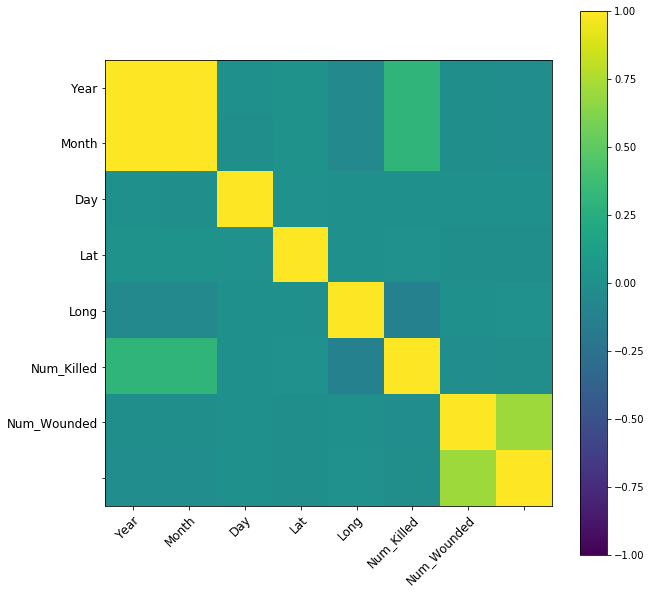

In [12]:
"""
Beginning Data Analysis
"""

"""
Correlation Table

The corr() of a Dataframe object gives us a list of correlations for each attribute tuple

fig initializes the graph

ax contains all of the useful information including:

colormap: defines what color pattern is used. Link at bottom with more choices
x and y labels: the labels to be used and fontsize in pts.
colorbar that shows how strongly numeric attributes are correlated.

plt.show() outputs our final plot

https://matplotlib.org/tutorials/colors/colormaps.html
"""

corr = df.corr()
fig,ax = plt.subplots(figsize=(10,10))

#plt.xticks(range(len(corr.columns)))
#plt.yticks(range(len(corr.columns))) 

cmap = cm.get_cmap('jet',30)
ax.imshow(corr, interpolation="nearest", cmap=cmap)

ax.set_xticklabels(corr.columns,fontsize=12)
ax.set_yticklabels(corr.columns,fontsize=12)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")
cax = ax.imshow(corr,vmax=1,vmin=-1)
fig.colorbar(cax)

plt.show()

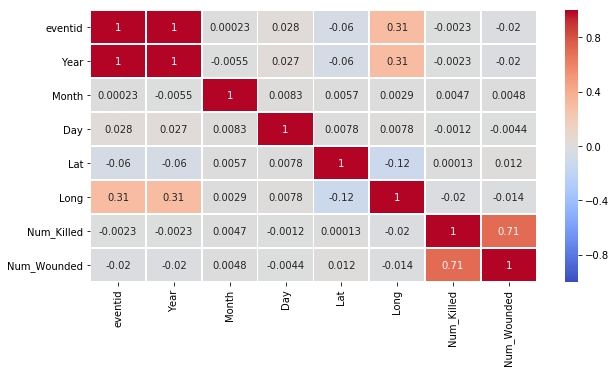

In [5]:
# Gets the correlation values for each attribute tuple
corr = df.corr()

# Sets the graph dimensions
plt.figure(figsize=(10,5))

"""
Creates the seaborn heatmap using the correlation list calculated from the dataframe above.

Optional attributes:

annot: (Boolean) shows the correlation values for each pair if set to True.
vmin/vmax: (Float) set the colorbar min and max values (default is drawn from values passed in)
linewidth: (Float) allows you to specify a line width (in pts.) in between cells.
cmap: (String) allows you to change the color map used. Other options below.


Color Palette Resources: 

https://seaborn.pydata.org/tutorial/color_palettes.html
http://seaborn.pydata.org/tutorial/color_palettes.html#qualitative-color-palettes
""" 
hmap = sns.heatmap(corr, annot=True, vmin=-1.0,vmax=1.0, linewidth = 0.5, cmap='coolwarm')

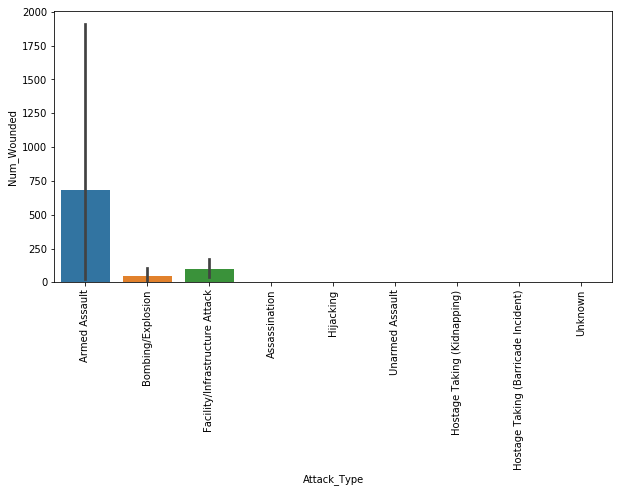

In [6]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.barplot(x=df['Attack_Type'], y=df['Num_Wounded'].value_counts(), data=df)

In [7]:
df['Weapon_Type'].unique()

array(['Firearms', 'Explosives', 'Incendiary', 'Sabotage Equipment',
       'Chemical', 'Melee', 'Unknown', 'Other', 'Fake Weapons',
       'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)',
       'Radiological', 'Biological'], dtype=object)

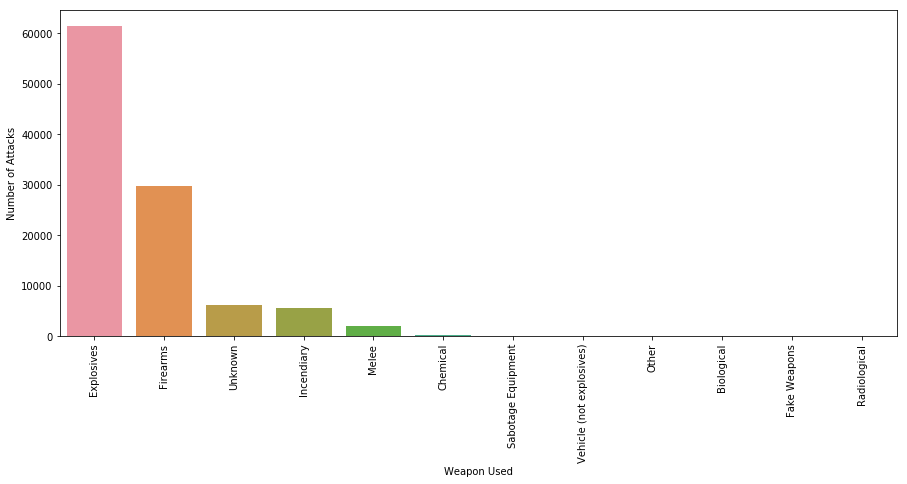

In [8]:
"""
https://www.kaggle.com/mehmettek/terrorism-in-the-middle-east-and-north-africa
"""

df['Weapon_Type']=df['Weapon_Type'].replace({'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)':'Vehicle (not explosives)'})
plt.subplots(figsize=(15,6))

sns.countplot('Weapon_Type', data = df, order=df['Weapon_Type'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel("Weapon Used")
plt.ylabel("Number of Attacks")
plt.show()

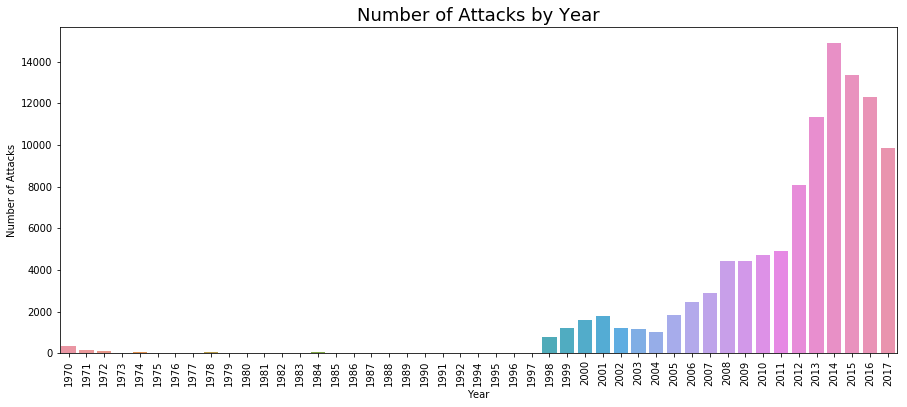

In [9]:
plt.subplots(figsize=(15,6))

sns.countplot('Year', data = df)
plt.xticks(rotation=90)
plt.xlabel("Year")
plt.ylabel("Number of Attacks")
plt.title("Number of Attacks by Year",fontsize=18)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


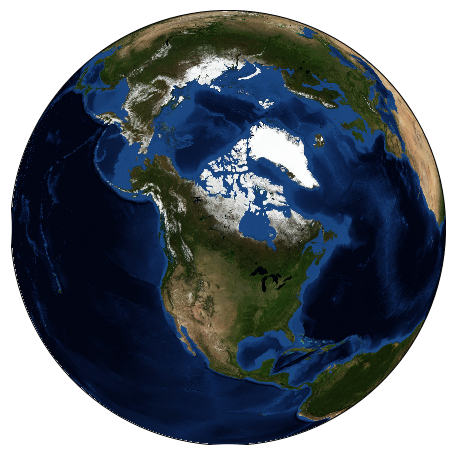

In [11]:
"""
https://www.kaggle.com/ash316/terrorism-around-the-world
"""

plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=60, lon_0=-100)
m.bluemarble(scale=0.5)